# Creditcard Fraud Detection with Cost Sensitive Random Forest.

$~$

$~$

$~$

<center>Marcelo de Oliveira Silva Guimarães</center>
<center> Aug, 21, 2017 </center>

$~$

$~$

In this notebook, the creditcard dataset from [kaggle](https://www.kaggle.com/dalpozz/creditcardfraud) is studied$^1$. This dataset contains a extremally unbalanced class distribuition:  492 frauds out of 284,807 transactions. We perform an exploratory analysis on the dataset followed by the application 
random forest classifier and then a sampled weighted random forest. We use a cost function applied to the random forest model to obtain the best performance based on the lowest cost that a credit card operator would have. 
This notebook is organized in the following way: first we present a brief introduction about handling unbalanced class and the metrics for algorithm performance. Then we present a exploratory analysis of the data. Finally we apply the chosen model to the data and discuss the results. We found that the cost matrix produced best results only on the training dataset. 
In future endeavors the same procedure could be applied to logistic boost regression and SVM, alternatively one could try to use SMOTE in an attempt to remove the overfitting caused by the cost function. 

$^1$ Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015


## Introduction

### Sampling
There several ways of dealing with clafficication with unbalanced classes we are going to overview three:

1. Oversampling
2. Undersampling
3. Smote

#### 1 - Oversampling
One can increase the number of samples of the minority class by taking more samples than it is availble. The problem with this approuch is that it is prone to overfiting since there will be a strong correlation between samples of the minority class.

#### 2- Undersamplig
This rebalance procedure consists in downsizing the majority class samples by selecting a number of random samples of the majority class equal to the number of samples of the minority class. The logic behind this procedure is that much of the majority samples are correlated and a great portion of the data can be removed without losing information.
Since this procedure is unsupervised there is a risk of losing relevant information. Some algorithms like LogitBoost are very sensitive to the prior probabilities. When one performs a undersampling procedure these prior probabilities are altered which shifts the cutoff probability by which the algorithm classify one class as positive. This shift in the cutoff probability can be calculted and It is described by Pozzolo et al$^1$.

#### 3-Smote
In order to coupe with the above mentioned issues, the Smote oversampling process was developed. Smote stands for Synthetic Minority Oversampling TEchnique. It consists in oversampling the minority samples by interpolating samples  of the same class. This has the effect of creating clusters around each sample, while the samples are correlated they are not as correlated as simple oversampling. 

### Metrics
Usually Accuracy and AUC ROC (Area Under the Curve of Receiving Operating Characteristic curve) are the common metrics for performance measure of the classification algorithm. However in unbalance dataset these measures can be deceiving.
If the Accuracy is close to the prior probability of the majority class no information is gained with the algorithm, i. e., the algorithm simply guess the majority class as the predicted one regardless of any features of the samples. 
The Recall and Precision are more apropriated metrics to deal with unbalanced class.
The $F_1$ measure combine both of these measures giving equal weight.
These are defined as follows:



|  |                                              |                                   |
| -- |--------------------------------------------- | ----------------------------------|
|  |        $TP$ =  True Positive  | $FN $=  False Positive|
|$Recall $  |$\frac{TP}{(FN+TP)}$ | $κ=Kappa =$ $\frac{(p_0 -p_e )}{(1-p_e )}$ |
|$Precision $  | $\frac{TP}{(FP+TP)}$ | $p_0 =$ Relative Observed Agreement |
|$F_1 $  |$ \frac{Precision*Recall}{(Precision+Recall)}~ $  | $p_e =$ Random Chance Agreement |
|$Accuracy$| $\frac{(TP+TN)}{(TP+TN+FP+FN)}$    | |

Pozollo suggests measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). This metric is defined here as "Averaged Precision". 

We define custom measurements based on cost:

 **Cost measure **: It is the cost associated with each possible outcome of a prediction:

1. **False Positive**: In the present scenario indicates the cost associated with detecting a fraud where none exists. It is the cost associated with the investigation of the fraud.
2. **False Negative**: It happens when the algorithm fails to detect a fraud. The cost associated with that ocurrency is the value of the transaction itself.
3. **True Positive**: The algorithm identifies the fraudulent transaction successfully. There are no cost associated with this event.
4. **True Negative**: The algorithm identifies correctly the transaction as normal. There are no cost associated with this event.

** Savings measure **: It is the amount that is saved if compared with the decision of a normal random forest. It is implement in the *costcla* package.

## Exploratory Analisys

In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
load_cached_results=False

In [2]:
# Loading dataset
dfs=pd.read_csv('creditcard.csv')

In [3]:
# Separating Class, features and indices
y_all=dfs["Class"]
X_all=dfs.iloc[:,0:30]
indices=np.arange(dfs.shape[0])

In [4]:
# Reserve 20% of data for final performance test
X_train,X_test,Y_train,Y_test,indices_train,indices_test=train_test_split(X_all,y_all,indices,stratify=y_all,random_state=814,test_size=0.20)

In [5]:
#Verifying that data was correctly stratified
[Y_train.mean(),len(Y_train),
Y_test.mean(),len(Y_test)]


[0.0017292457591783889, 227845, 0.0017204452090867595, 56962]

In [161]:
# Let just look to the data to see if anything pops out
#dfs.describe()
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from costcla.datasets import load_creditscoring1
from costcla.models import CostSensitiveRandomForestClassifier
from costcla.metrics import savings_score
#data= load_creditscoring1()
#sets= train_test_split(data.data, data.target, data.cost_mat, test_size=0.33, random_state=0)
#X_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test= sets
rf= RandomForestClassifier(random_state=0).fit(X_train, Y_train)
y_pred_test_rf=rf.predict(X_test)
f= CostSensitiveRandomForestClassifier()
csdt= f.fit(np.array(X_train), np.array(Y_train), np.array(cond(X_train)))
y_pred_test_csdt=csdt.predict(np.array(X_test))

#print(savings_score(Y_test, y_pred_test_csdt, cond(X_test)))


In [162]:
# Savingsusing only RandomForest
print(savings_score(np.array(Y_test), np.array(y_pred_test_rf), np.array(cond(X_test))))
# Savingsusing CostSensitiveRandomForestClassifier
print(savings_score(np.array(Y_test), np.array(y_pred_test_csdt), np.array(cond(X_test))))


0.705624392996
0.774192053977


## Function Definitions

In [80]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from costcla.models import CostSensitiveRandomForestClassifier
from costcla.metrics import savings_score
import sklearn.model_selection 
import pandas as pd
import os


The scikit-learn version is 0.19.0.


In [116]:
# Logical Functions
from costcla.metrics import savings_score
import time
import pickle
from sys import stdout
refresh=stdout.flush 

class Timer:
    def __enter__(self):
        self.start = time.clock()
        return self

    def __exit__(self, *args):
        self.end = time.clock()
        self.interval = self.end - self.start

def costPerformance(X,Y_true,Y_pred):
    
    if(len(X) != len(Y_true)):
      raise ValueError('Length of X and Y do not match')
    # In case of False Negative the credit operator assumes the cost of the fraudulent transaction:
    Y_pred=np.array(Y_pred)
    Y_true=np.array(Y_true)    
    #FNcost=sum(X.iloc[np.where((((Y_pred==0)+0) * (Y_true==1))==1)].Amount)
    FNcost=sum((X[np.where((((Y_pred==0)+0) * (Y_true==1))==1),np.shape(X)[1]-1])[0])
    # In case of False Positive the credit operator assumes the cost of verifying the transaction(calling the costumer, investigating):
    # Here we assume a cost of 1 $ per instance 
    cost_per_instance=1
    FPcost=sum(((Y_pred==1)+0) * (Y_true==0))*cost_per_instance
    #Return the cost by number of transations
    return ((FPcost+FNcost)/len(X))

def fpfncost(X,i):

    return([1,X[i,np.shape(X)[1]-1],0,0])

def costScorer(cutoff=0.5):
    def cost(estimator,X,y_true):
        y_pred=(estimator.predict_proba(X)[:,1]>cutoff)+0
        return costPerformance(X,y_true,y_pred)
    return cost

def cond(X):
    X=np.array(X)
#    return np.array(([fpfncost(X,i) for i in range(len(X.index))]))
    return np.array(([fpfncost(X,i) for i in range(np.shape(X)[0])]))

def savingScorer(cutoff=0.5):
    def saving(estimator,X,y_true):
        y_pred=(estimator.predict_proba(X)[:,1]>cutoff)+0
        cost_mat=cond(np.array(X))
        return savings_score(y_true,y_pred,cost_mat)
    return saving

def WeightedRandomForestClassifier(X_train,
                                   Y_train,
                                   step=1,
                                   max_iter=10, 
                                   sample_weight=None,
                                   random_state=1814,
                                   cutoff=0.5):
    X_train.reset_index(drop=True)
    scores=[]
    if(sample_weight is None):
        par=dict({'sample_weight' : sample_weight})
        step=5
        rfc = RandomForestClassifier(n_estimators=step, warm_start=True,random_state=random_state)
    else:
        cost_mat=cond(X_train)
        #cost_mat=np.array([fpfncost(X_train,i) for i in range(len(X_train.index))])
        par=dict({'cost_mat' : cost_mat})
        rfc = CostSensitiveRandomForestClassifier(n_estimators=step)
        
    
    scoring = {'precision_macro':'precision_macro',
               'recall_macro':'recall_macro',
               'f1_macro':'f1_macro',
               'average_precision':'average_precision',
               'kappa':make_scorer(metrics.cohen_kappa_score),
               'cost':costScorer(cutoff),
               'saving':savingScorer(cutoff)
               }
    
    for n in range(max_iter):
        print("\t RandomForestIteration "+str(n) )
        stdout.flush()
        with Timer() as t:
            score = cross_validate(rfc, np.array(X_train), np.array(Y_train), scoring=scoring,cv=5,fit_params=par)
        print("\t \t took " + str(int(t.interval))+ " seconds")
        stdout.flush()
        rfc.n_estimators += step
        scores.append(score)
    return((scores,rfc))

def getDfScores(scores,max_iter):
    measures=scores[1].keys()
    for measure in measures:
        for i in range(max_iter):
            yield(i,measure,scores[i][measure].mean(),scores[i][measure].std())

def getResults(scores,max_iter=10):            
    results=[row for row in getDfScores(scores,max_iter)]
    df_results=pd.DataFrame(results,columns=["iteration","measure","mean","std"])
    return(df_results)

def getDfScoresRaw(scores,max_iter=10):            
    measures=scores[1].keys()

    for measure in measures:
        for i in range(max_iter):
            yield(i,measure,(scores[i][measure]))
            
def getResultsRaw(scores,max_iter=10):            
    results=[row for row in getDfScoresRaw(scores,max_iter)]
    df_results=pd.DataFrame(results,columns=["iteration","measure","plot"])
    return(df_results)

def filterResults(df,Iter=0,partition='train'):
    return(df[(df.iteration==Iter).ravel() & df.measure.apply(lambda x: x.split('_')[0] ==partition).ravel() ])

def savingsThreshold(X,Y,estimators,thrl):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.20)
    times=list()
    fits=list()
    for it in estimators:
        print('\t Starting model at iteraction '+str(it))
        stdout.flush()
        with Timer() as t:
            cost_mat=cond(X_train)
            rfc = CostSensitiveRandomForestClassifier(n_estimators=it+1)
            fits.append(rfc.fit(np.array(X_train),np.array(Y_train),cost_mat=np.array(cost_mat)))
        times.append(t.interval)
        print('\t\t took '+str(int(t.interval))+' seconds to fit')
        refresh()
    
    results=dict()
    result=[[savings_score(Y_train,(z.predict_proba(np.array(X_train)) > thr)[:,1],cost_mat=cond(X_train)) for thr in thrl] for z in fits]
    results['train']=pd.DataFrame(result,columns=[str(e) for e in thrl],index=np.array((estimators))+1)
    result=[[savings_score(Y_test,(z.predict_proba(np.array(X_test)) > thr)[:,1],cost_mat=cond(X_test)) for thr in thrl] for z in fits]
    results['test']=pd.DataFrame(result,columns=[str(e) for e in thrl],index=np.array((estimators))+1)    
    return((results,times,fits))

def getSavings(X,Y,realizations=5,estimators=np.array(range(5)),label="",thrl=np.array(range(18))*0.05+0.1):
    results=list()
    for it in range(realizations):
        print('savings iteration '+str(it))
        stdout.flush()
        data=savingsThreshold(X,Y,estimators,thrl)
     #   print('  iteration '+str(it)+ ' finished')
     #   stdout.flush()
        checkpoint=open('savings_'+label+str(it)+'.pkl','wb')
        pickle.dump(data,checkpoint)
        checkpoint.close()
        results.append(data)
    return(results)

# Plot Functions
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from IPython.display import display



def plotSavings(results,partition='test'):
    it=0
    for data in results:
        (result,times,fits)=data
        result=result[partition]
        if(it==0):
            fresult=result
        else:
            fresult=fresult+result
        it+=1
    xx=fresult.columns
    yy=fresult.index
    xx,yy=np.meshgrid(xx,yy)
    cs=plt.contourf(xx,yy,fresult/it)
    plt.colorbar(cs)
    #plt.clabel(cs, inline=1, fontsize=10)
    plt.title("Savings for "+partition+" dataset with "+ str(it)+ " iteractions")
    plt.xlabel("Cutoff probability")
    plt.ylabel("Iterations")
    plt.show()
    
def plotSavingsError(results,partition='test'):
    it=0
    for data in results:
        (result,times,fits)=data
        result=result[partition]
        if(it==0):
            fresult=result
        else:
            fresult=fresult+result
        it+=1
    fresult=fresult/it
    error=0
    it=0
    for data in results:
        (result,times,fits)=data
        result=result[partition]
        if(it==0):
            error=(fresult-result)*(fresult-result)
        else:
            error=error+(fresult-result)*(fresult-result)
        it+=1
    fresult=error/it
    xx=fresult.columns
    yy=fresult.index
    xx,yy=np.meshgrid(xx,yy)
    cs=plt.contourf(xx,yy,fresult)
    plt.colorbar(cs)
   #plt.clabel(cs, inline=1, fontsize=10)
    plt.title("Savings for "+partition+" dataset with "+ str(it)+ " iteractions")
    plt.xlabel("Cutoff probability")
    plt.ylabel("Iterations")
    plt.show()
        
def myplot(measure,raw):
    variant=["train_","test_"]
    if(measure=='time'):
        variant=["fit_","score_"]
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    # Create the boxplot
    data_to_plot = (list(raw[raw.measure == variant[0]+measure]['plot']))
    bplot1 = ax.boxplot(data_to_plot, patch_artist=True)

    data_to_plot = (list(raw[raw.measure == variant[1]+measure]['plot']))
    bplot2 = ax.boxplot(data_to_plot, patch_artist=True)

    colors = ['red', 'green']
    labels = variant
    patches = list()
    patches.append(mpatches.Patch(color=colors[0], label=labels[0]))
    patches.append(mpatches.Patch(color=colors[1], label=labels[1]))

    plt.legend(handles=patches)
    ci = 0
    for bplot in (bplot1, bplot2):
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[ci])
        ci = ci + 1

    plt.xlabel('number of iterations')
    plt.ylabel(measure+' Score')
    plt.show()
    
def barPlot(df_results):
    plt.figure()
    z=df_results[(df_results.measure != 'fit_time').ravel() & df_results.measure.apply(lambda x: x.split('_')[0]=='train' ).ravel()  ].pivot(index='iteration',columns='measure',values='mean').plot(kind='bar').legend(bbox_to_anchor=(1.2, 0.5))
    plt.title("Train set: Measures vs Iteration")
    z=df_results[(df_results.measure != 'fit_time').ravel() & df_results.measure.apply(lambda x: x.split('_')[0]=='train' ).ravel()  ].pivot(index='iteration',columns='measure',values='std').plot(kind='bar').legend(bbox_to_anchor=(1.2, 0.5))
    plt.title("Train set: Measures errors vs Iteration")
    z=df_results[(df_results.measure != 'fit_time').ravel() & df_results.measure.apply(lambda x: x.split('_')[0]=='test' ).ravel()  ].pivot(index='iteration',columns='measure',values='mean').plot(kind='bar').legend(bbox_to_anchor=(1.2, 0.5))
    plt.title("Test set: Measures vs Iteration")
    z=df_results[(df_results.measure != 'fit_time').ravel() & df_results.measure.apply(lambda x: x.split('_')[0]=='test' ).ravel()  ].pivot(index='iteration',columns='measure',values='std').plot(kind='bar').legend(bbox_to_anchor=(1.2, 0.5))
    plt.title("Test set: Measures errors vs Iteration")
    plt.show()
    
def plotPerformanceConvergence(scores,df_results,max_iter=10):
    df_results.sort_values('measure')
    raw=getResultsRaw(scores,max_iter)
    df_resultsNoCost=df_results[df_results.measure.apply(lambda x: x.split("_")[1] not in ["cost","saving"])]
    df_resultsCost=df_results[df_results.measure.apply(lambda x: x.split("_")[1] in ["cost","saving"])]    
    myplot("f1_macro",raw)
    myplot("recall_macro",raw)
    myplot("precision_macro",raw)
    myplot("time",raw)
    barPlot(df_resultsNoCost)
    barPlot(df_resultsCost)
    display(filterResults(df_results.sort_values('measure'),max_iter-1))
    display(filterResults(df_results.sort_values('measure'),max_iter-1,'test'))
    
  


## Undersampling

Here we undersample the normal samples down to the same number of fraud samples the final set is 90% normal 10% fraud.
The data will remain unbalanced so we can make sure we can address this problem before applying the final solution to the Test dataset. The choice to undersamplel to this ratio was defined arbitraly.

In [83]:
from numpy.random import choice as sample
fraud_indexes=indices_train[np.where(Y_train==1)]
normal_indexes=indices_train[np.where(Y_train==0)]
undersampled_normal_indexes=sample(normal_indexes,len(fraud_indexes),False)
undersampled_indexes=list(fraud_indexes)+list(undersampled_normal_indexes)
X_under=X_all.iloc[undersampled_indexes]
Y_under=y_all.iloc[undersampled_indexes]

## Random Forest with default class weights
In this section we run a RandomForestClassifier start with 5 estimators. We run a total of 10 iteration and at each iteration we conduct a 5 fold cross-validation and increment 5 estimators.

In [84]:
(scores,rfc)=WeightedRandomForestClassifier(X_under,Y_under, sample_weight=None,cutoff=0.5)
df_results=getResults(scores)

	 RandomForestIteration 0
	 	 took 0 seconds
	 RandomForestIteration 1
	 	 took 0 seconds
	 RandomForestIteration 2
	 	 took 0 seconds
	 RandomForestIteration 3
	 	 took 0 seconds
	 RandomForestIteration 4
	 	 took 0 seconds
	 RandomForestIteration 5
	 	 took 0 seconds
	 RandomForestIteration 6
	 	 took 0 seconds
	 RandomForestIteration 7
	 	 took 0 seconds
	 RandomForestIteration 8
	 	 took 0 seconds
	 RandomForestIteration 9
	 	 took 0 seconds


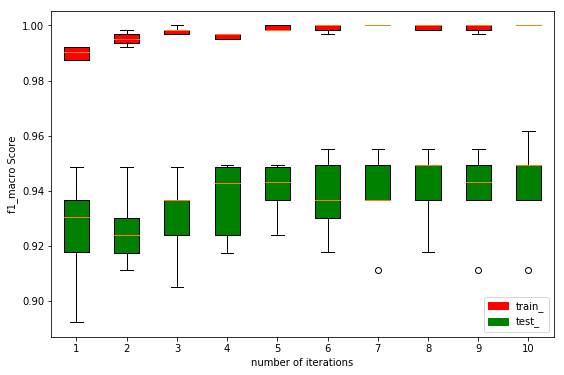

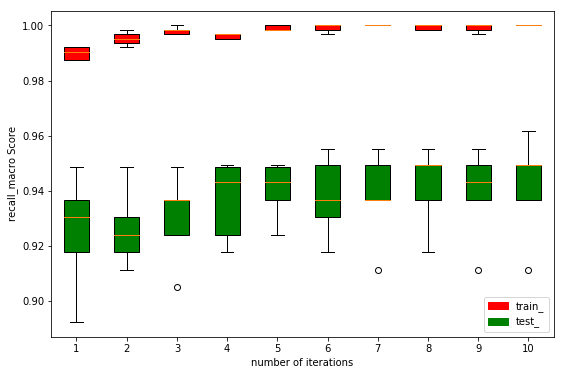

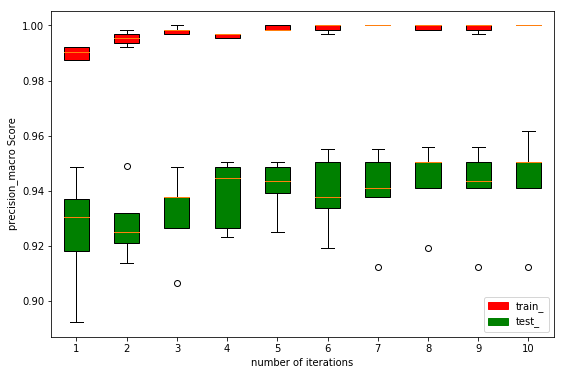

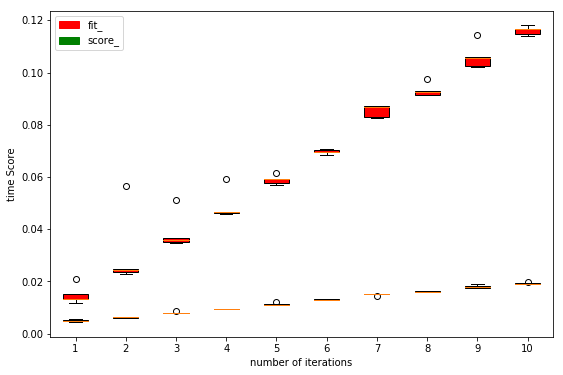

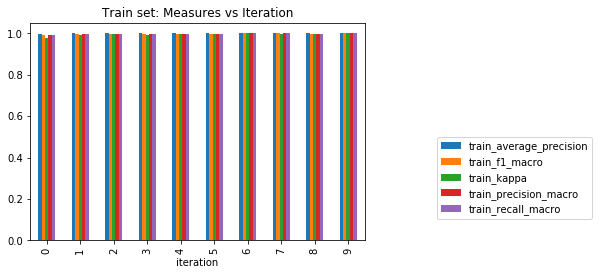

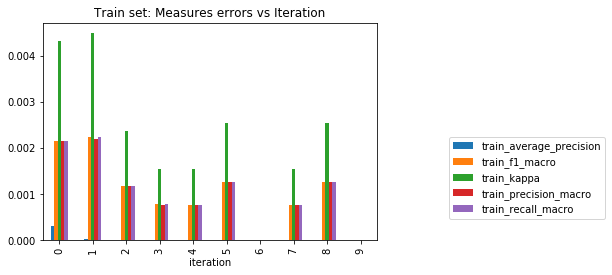

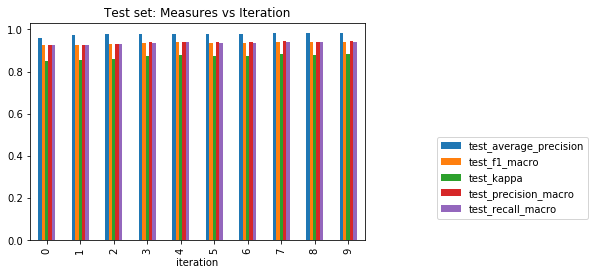

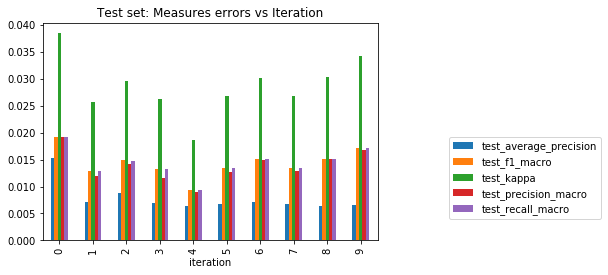

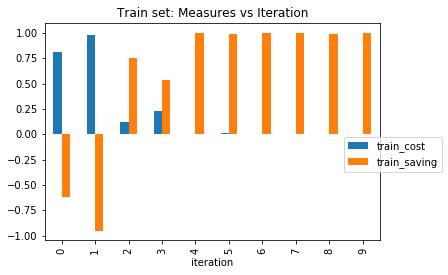

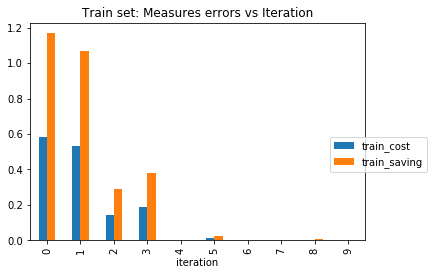

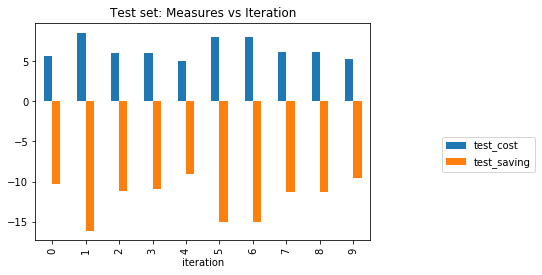

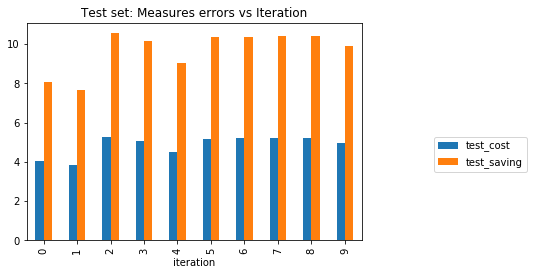

,iteration,measure,mean,std
139,9,train_average_precision,1.0,0.0
9,9,train_cost,0.0,0.0
109,9,train_f1_macro,1.0,0.0
149,9,train_kappa,1.0,0.0
89,9,train_precision_macro,1.0,0.0
39,9,train_recall_macro,1.0,0.0
59,9,train_saving,1.0,0.0


,iteration,measure,mean,std
129,9,test_average_precision,0.981636,0.006497
159,9,test_cost,5.308270,4.965164
99,9,test_f1_macro,0.941617,0.017079
79,9,test_kappa,0.883350,0.034113
29,9,test_precision_macro,0.943314,0.016758
69,9,test_recall_macro,0.941675,0.017056
119,9,test_saving,-9.616541,9.930327


In [85]:
plotPerformanceConvergence(scores,df_results)

The savings from the test partition are well below the ones from the train set. This is a indication how the model fails to generalize the savings. It looks to optimize classification and fails to account for the specific value of the transaction.

## Weighted Random Forest

We define the weights to be used as a cost function for the random forest.

In [86]:
import math
from costcla import CostSensitiveRandomForestClassifier
# Weight= 1 if Y == 0 , Weight =Amount if Y==1
sample_weights=(X_under['Amount'].apply(lambda z: math.log(z+0.000001))*Y_under.ravel()).apply(lambda z: math.exp(z))

Before we run the weighted algorithm with full range of estimators we conduct an exploratory search for the cutoff probability to optimize the precision and recall accounting cost. The optimal solution was to conduct a grid search but due to time and hardware constraints we will only perform a rough parameter selection.

In [105]:
results=getSavings(X_under,Y_under,realizations=20,
                   estimators=[3,6,9],
                   label="exploratory_",thrl=np.array(range(20))*0.05)

savings iteration 0
	 Starting model at iteraction 3
		 took 1 seconds to fit
	 Starting model at iteraction 6
		 took 6 seconds to fit
	 Starting model at iteraction 9
		 took 6 seconds to fit
savings iteration 1
	 Starting model at iteraction 3
		 took 3 seconds to fit
	 Starting model at iteraction 6
		 took 5 seconds to fit
	 Starting model at iteraction 9
		 took 9 seconds to fit
savings iteration 2
	 Starting model at iteraction 3
		 took 2 seconds to fit
	 Starting model at iteraction 6
		 took 4 seconds to fit
	 Starting model at iteraction 9
		 took 6 seconds to fit
savings iteration 3
	 Starting model at iteraction 3
		 took 2 seconds to fit
	 Starting model at iteraction 6
		 took 5 seconds to fit
	 Starting model at iteraction 9
		 took 6 seconds to fit
savings iteration 4
	 Starting model at iteraction 3
		 took 3 seconds to fit
	 Starting model at iteraction 6
		 took 5 seconds to fit
	 Starting model at iteraction 9
		 took 9 seconds to fit
savings iteration 5
	 Starting

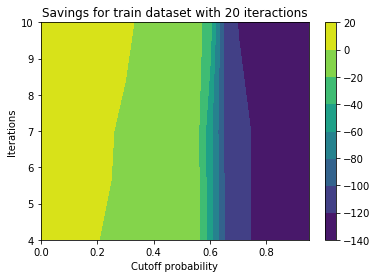

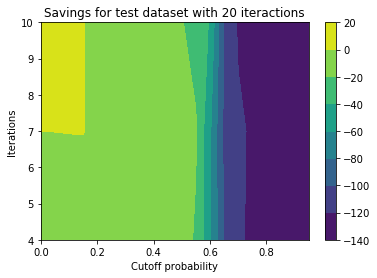

In [117]:
plotSavings(results,'train')
plotSavings(results)

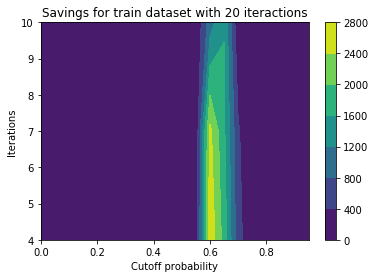

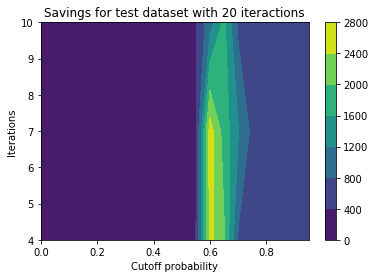

In [110]:
plotSavingsError(results,'train')
plotSavingsError(results,'test')

In [102]:
len(results)

3

The error both in the train and in the test dataset are greater above 7 estimatores and near 0.6 cutoff.
Let's repeat the procedure to see if the results are reliable.
There is no problem in performing this exploratory search because we are separating our Train set between another Train subset and a validation set. The original Test dataset representing 20% of the data remains untouched.

In [111]:
resultsB=getSavings(X_under,Y_under,realizations=20,
                   estimators=[3,4,5,6,7,8,9],
                   label="exploratory_",thrl=np.array(range(33))*0.01)

savings iteration 0
	 Starting model at iteraction 3
		 took 1 seconds to fit
	 Starting model at iteraction 4
		 took 3 seconds to fit
	 Starting model at iteraction 5
		 took 4 seconds to fit
	 Starting model at iteraction 6
		 took 6 seconds to fit
	 Starting model at iteraction 7
		 took 6 seconds to fit
	 Starting model at iteraction 8
		 took 7 seconds to fit
	 Starting model at iteraction 9
		 took 8 seconds to fit
savings iteration 1
	 Starting model at iteraction 3
		 took 3 seconds to fit
	 Starting model at iteraction 4
		 took 5 seconds to fit
	 Starting model at iteraction 5
		 took 6 seconds to fit
	 Starting model at iteraction 6
		 took 5 seconds to fit
	 Starting model at iteraction 7
		 took 6 seconds to fit
	 Starting model at iteraction 8
		 took 8 seconds to fit
	 Starting model at iteraction 9
		 took 9 seconds to fit
savings iteration 2
	 Starting model at iteraction 3
		 took 2 seconds to fit
	 Starting model at iteraction 4
		 took 1 seconds to fit
	 Starting m

		 took 2 seconds to fit
	 Starting model at iteraction 5
		 took 4 seconds to fit
	 Starting model at iteraction 6
		 took 4 seconds to fit
	 Starting model at iteraction 7
		 took 7 seconds to fit
	 Starting model at iteraction 8
		 took 5 seconds to fit
	 Starting model at iteraction 9
		 took 5 seconds to fit


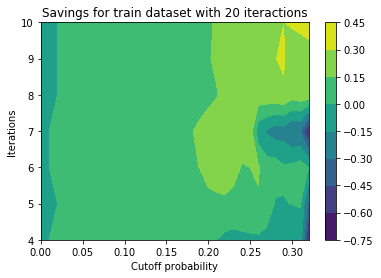

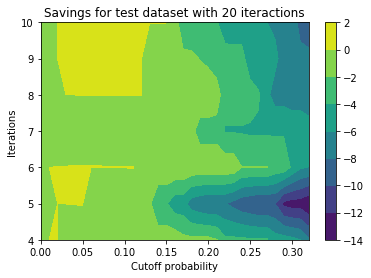

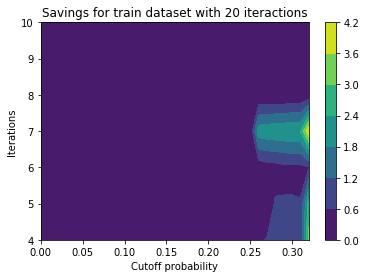

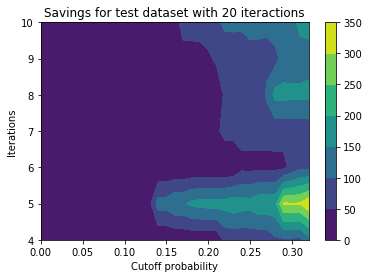

In [118]:
plotSavings(resultsB,'train')
plotSavings(resultsB,'test')
plotSavingsError(resultsB,'train')
plotSavingsError(resultsB,'test')

In [114]:
first=True
it=0
for d in [pd.DataFrame(a['train']) for a,b,c in [r for r in resultsB] ]:
    #display(d)
    if(first):
        aux=d
    else:
        aux=aux+d
    it=it+1

aux=aux/it
aux

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32
4,0.0,0.0,0.0,0.002222,0.002381,0.003492,0.005397,0.005873,0.006349,0.006667,...,0.021429,0.023689,0.024006,0.024165,0.024165,0.024165,0.024165,0.024165,0.024165,0.024165
5,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014286,0.014603,0.014603,0.015079,0.015238,0.015714,0.015714,0.015873,0.015873,0.015873
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007778,0.007778,0.007778,0.007778,0.016032,0.017460,0.017619,0.019841,0.021111,0.021905
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000794,0.000952,0.001429,0.003492,0.004444,0.004603,0.004762,0.004762,0.004762,0.006349
8,0.0,0.0,0.0,0.000000,0.000635,0.001270,0.001270,0.002063,0.002063,0.002063,...,0.007151,0.009056,0.009690,0.010484,0.011913,0.012389,0.012706,0.018738,0.015578,0.016689
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014444,0.014603,0.014921,0.015079,0.015556,0.016825,0.017143,0.017460,0.017778,0.018254
10,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016984,0.016984,0.017143,0.017778,0.017778,0.017778,0.017778,0.015246,0.015246,0.015246


It seems that the cutoff 0.12 and 7 number of estimators provides the optimal savings. 

In [115]:
first=True
it=0
for d in [pd.DataFrame(a['test']) for a,b,c in [r for r in resultsB] ]:
    #display(d)
    if(first):
        aux=d
    else:
        aux=aux+d
    it=it+1

aux=aux/it
aux

,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32
4,0.0,0.0,0.0,0.003165,0.003797,0.003797,0.005063,0.005696,0.005696,0.005696,...,-0.325354,-0.325354,-0.324848,-0.324848,-0.324848,-0.324848,-0.324848,-0.324848,-0.324848,-0.324848
5,0.0,0.0,0.0,0.000633,0.000633,0.001266,0.001266,0.001266,0.001266,0.001266,...,-0.329785,-0.329785,-0.329785,-0.329785,-0.329785,-0.329785,-0.329785,-0.329785,-0.329785,-0.329785
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.339911,-0.339911,-0.339911,-0.339911,-0.330418,-0.329785,-0.329785,-0.326620,-0.326620,-0.326620
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001266,0.001266,0.001266,0.002532,0.005063,0.005063,0.005063,0.005063,0.005063,0.005696
8,0.0,0.0,0.0,0.000000,0.000633,0.001266,0.001266,0.001266,0.001266,0.001266,...,0.009494,0.013924,0.015190,0.015823,0.015823,0.015823,0.016456,-0.489829,-0.487297,-0.486665
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.330418,-0.330418,-0.329152,-0.329152,-0.327253,-0.325987,-0.325987,-0.325987,-0.325987,-0.325987
10,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.492994,-0.492994,-0.492361,-0.492361,-0.492361,-0.491728,-0.491728,-0.491095,-0.491095,-0.491095


We now run the full weighted random forest with cutoff 0.12 and number of estimators 7, just to make sure that the results converged. It is not good, but it is close enough.

In [94]:
(wscores,wrfc)=WeightedRandomForestClassifier(X_under,Y_under,step=3,max_iter=3,sample_weight=sample_weights,cutoff=0.12)


	 RandomForestIteration 0
	 	 took 113 seconds
	 RandomForestIteration 1
	 	 took 224 seconds
	 RandomForestIteration 2
	 	 took 343 seconds


In [95]:
wdf_results=getResults(wscores,3)

# Results

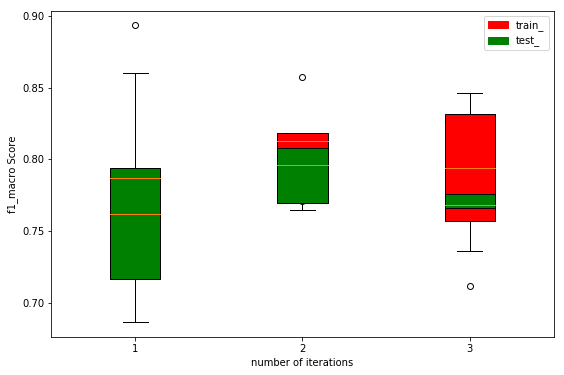

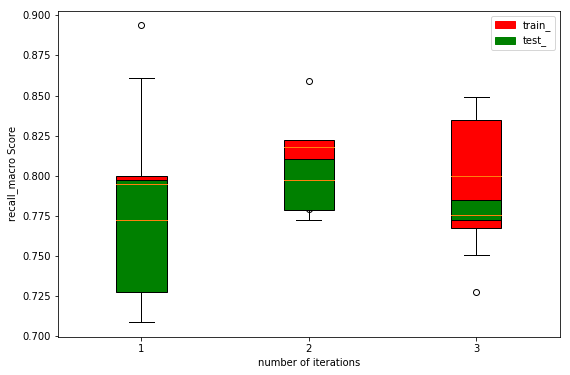

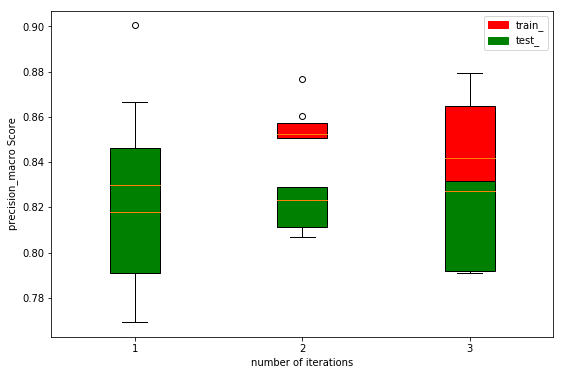

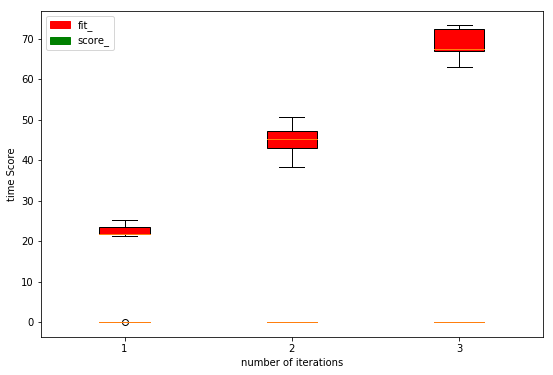

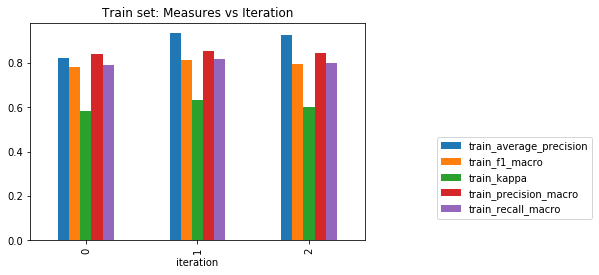

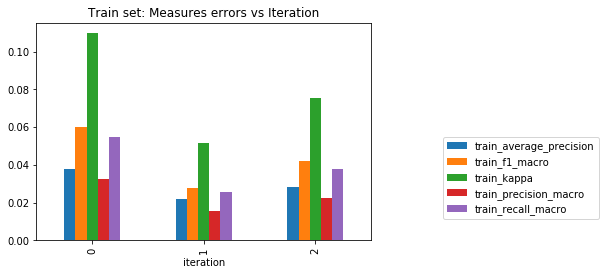

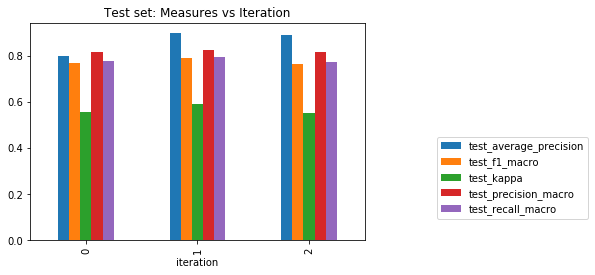

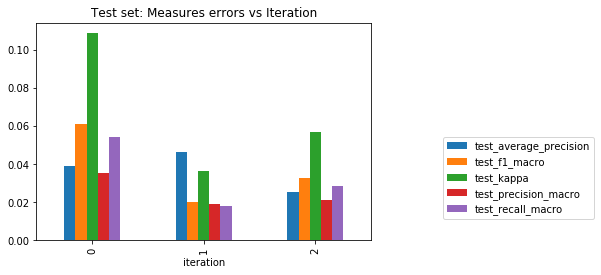

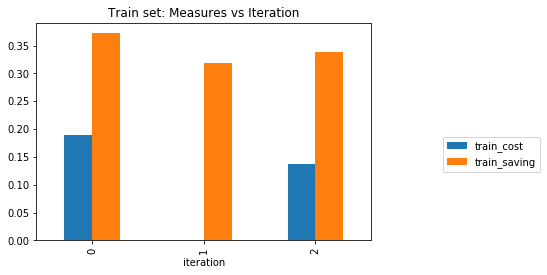

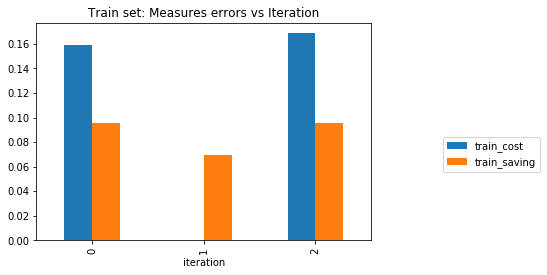

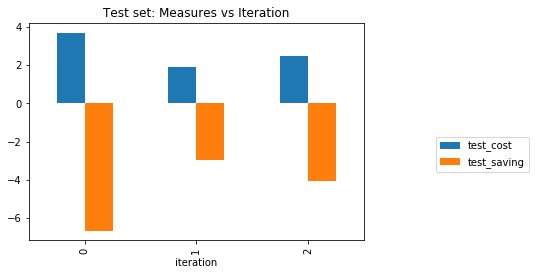

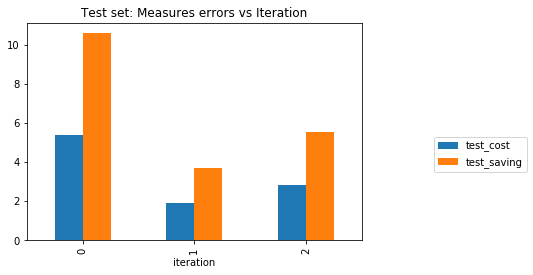

,iteration,measure,mean,std
41,2,train_average_precision,0.926594,0.028288
2,2,train_cost,0.137192,0.168467
32,2,train_f1_macro,0.792864,0.042069
44,2,train_kappa,0.600930,0.075489
26,2,train_precision_macro,0.846367,0.022578
11,2,train_recall_macro,0.800465,0.037745
17,2,train_saving,0.338949,0.095917


,iteration,measure,mean,std
38,2,test_average_precision,0.891279,0.025601
47,2,test_cost,2.471063,2.807642
29,2,test_f1_macro,0.767366,0.032657
23,2,test_kappa,0.550763,0.056892
8,2,test_precision_macro,0.816509,0.021006
20,2,test_recall_macro,0.775381,0.028446
35,2,test_saving,-4.067768,5.509327


In [96]:
plotPerformanceConvergence(wscores,wdf_results,3)


This models seem lees prone to overfitting, both *cost* and *savings* have scores better than the unweighted version. The model lost performance regarding precision (average_precision),  but compensated with finantial gain. The cost of the test set reduced from 2.97 to 1.72. There was a similar improvement in the savings measurement of the test set from -2.3 to -0.91. It is a good improvement however is not positive yet.

## Final model

We had determined the cutoff probability as cutoff=0.12, however we are going to apply the model to a dataset with a different underlining distribuition that can change the cutoff to a lower value since the majority class will become more proeminent.
There are several probability cutoff procedures$^1$ (Pozzolo et al) that could be followed in the future, now we will content to the current value.


In [ ]:
from sklearn.metrics import average_precision_score,f1_score,recall_score,precision_score

In [138]:
scoring = {'precision_macro':(precision_score),
               'recall_macro':(recall_score),
               'f1_macro':(f1_score),
               'average_precision':(average_precision_score)
               }
cost_mat=cond(X_under)
np.random.seed(2814)
csr = CostSensitiveRandomForestClassifier(n_estimators=10)
frfc = RandomForestClassifier(n_estimators=10,random_state=2814)

In [139]:
np.random.seed(2814)
cost_fit=csr.fit(np.array(X_under),np.array(Y_under),cost_mat=np.array(cost_mat))
rfc_fit=frfc.fit(X_under,Y_under)

In [142]:

def calcPred(model,X,cutoff):
    return((model.predict_proba(np.array(X)) > cutoff)[:,1]+0)
def scorer(score,y_true,y_pred):
    return score(np.array(y_true),np.array(y_pred),average='macro')
def final(estimator,X,y_true,cutoff,scoring):
    y_pred=calcPred(estimator,X_test,cutoff)
    cost_mat=cond(X)
    r=[(s,scorer(scoring[s],np.array(y_true),y_pred)) for s in scoring.keys()]+[('kappa',metrics.cohen_kappa_score(y_true,y_pred))]
    r=r+[('savings',savings_score(y_true,y_pred,cost_mat))]+[('costs',costPerformance(X,y_true,y_pred))]
    return(r)

In [143]:
estimators=dict({'cost':cost_fit,'normal':rfc_fit})

In [144]:
def Summary(cutoff,estimators,X_test,Y_test,scoring):
    X_test=np.array(X_test)
    finalResults=[final(estimators[estimator],X_test,Y_test,cutoff,scoring) for estimator in estimators.keys() ]
    display(pd.DataFrame(finalResults[0],columns=["measure","cost weighted"]))
    display(pd.DataFrame(finalResults[1],columns=["measure","normal"]))
    

In [155]:
Summary(estimators=estimators,X_test=X_test,Y_test=Y_test,scoring=scoring,cutoff=0.12)

,measure,cost weighted
0,precision_macro,0.500862
1,f1_macro,0.003704
2,recall_macro,0.500994
3,average_precision,0.001724
4,kappa,0.000007
5,savings,-3.694798
6,costs,0.000000


,measure,normal
0,precision_macro,0.503042
1,f1_macro,0.430770
2,recall_macro,0.843493
3,average_precision,0.005975
4,kappa,0.008939
5,savings,-0.253828
6,costs,0.266078


In [146]:
Summary(estimators=estimators,X_test=X_test,Y_test=Y_test,scoring=scoring,cutoff=0.5)

,measure,cost weighted
0,precision_macro,0.502174
1,f1_macro,0.386505
2,recall_macro,0.799025
3,average_precision,0.004350
4,kappa,0.005364
5,savings,-0.796526
6,costs,0.381246


,measure,normal
0,precision_macro,0.523324
1,f1_macro,0.536628
2,recall_macro,0.923397
3,average_precision,0.041338
4,kappa,0.085995
5,savings,0.773439
6,costs,0.048079


## Remarks
In this notebook we compared two random forest models applied to a fraud detection problem. Due to class unbalance we  downsized the majority class down to 9 times the minority class sample size. We include two cost related measures in the algorithm. At first the cost weighted model seemed to perform better than the usual random forest, upon closer inspection the unweighted model performed better in all accounts. The weighted model failed to generalize the good results of the training set to new data. One possible explanation to this lack of performance is related with the negative savings found. This negative value may occur due to incomplete code in the package used. Code inspection revealed that in the tree spliting process one does not check for the zero value cost weight. 
The regular random forest performed really well to the unbalanced data using default parameters (aside from n_estimators). The cost due to fraud alone can be calculated as:

In [ ]:
Total_Fraud_cost_per_transaction=int(sum(y_all*X_all.Amount)/len(y_all)*100)
Total_Fraud_cost_per_transaction

The best performing algorithm reduced this value down to $0.03$, $86$% cost reduction. It should be interesting to see if this value could be futher reduced using different parameters, algorithms, or sampling tecniques.

## Other References
2. http://bigdata-madesimple.com/dealing-with-unbalanced-class-svm-random-forest-and-decision-tree-in-python/
3. http://scikit-learn.org/stable/modules/cross_validation.html
4. http://www.clips.uantwerpen.be/~vincent/pdf/microaverage.pdf